# 1. HUMAN CAPITAL

In [1]:
# importing useful packages
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy import optimize
from sympy import *
import sympy as sm
import pylab

sm.init_printing(use_unicode=True)

# Question 1

Start defining the utility function for period 2 with the following informations:

    U2(h2) = max. ((C2**(1-rho))/(1-rho))-gamma*l2
    C2 = w*h2*l2
    h2 = h1+l1+x (we defined x as a variable to express the two possibilities of delta)
    w = 2
    rho = 2
    gamma = 0.1

In [2]:
# defining proper symbols
w = sm.symbols('w')
h1 = sm.symbols('h1')
l1 = sm.symbols('l1')
l2 = sm.symbols('l2')
rho = sm.symbols('rho')
gamma = sm.symbols('gamma')
x = sm.symbols('x')

For period 2, replacing the arguments we have the utility function of:

    U2(h2) = ((((w*(h1+l1+x)*l2)**(1-rho))/(1-rho))-gamma*l2)
    
We know that if L2 = 0, C2 = b = 1. Thus, we can conclude that U2 = -1

This conclusion means that the worker will choose to work in period 2 if U2 > -1

In [3]:
# defining u2(utility function for period 2)
def u2(h1,l1,l2,x,w=2,rho=2,gamma=0.1):
    return ((((w*(h1+l1+x)*l2)**(1-rho))/(1-rho))-gamma*l2)

In [4]:
# defining the given vectors for the respective variables
h1_vec = np.linspace(0.1,1.5,100)
l1_vec = [0,1]
l2_vec = [0,1]
x_vec = [0,0.1]

To maximize the utility function, we are looking separetely for the four cases faced by the worker:
    
    1st case: l1=1, l2=1 and x=0.1
    2nd case: l1=1, l2=1 and x=0
    3rd case: l1=0, l2=1 and x=0.1
    4th case: l1=0, l2=1 and x=0
    
We will analyse each case and conclude with the choice of the worker (assuming that she can choose only the values of L1 and L2 and that X depends on a stochastic experience)

In [5]:
# a. finding values of h1 that makes she work, for each case


    # 1st case: l1=1, l2=1 and x=0.1
u2_vec1 = np.empty(100)
x_list1 = list('') # list to add all the values of h1 that makes u2 > -1
for i,x in enumerate(h1_vec):
    u2_now1 = u2_vec1[i] = u2(x,1,1,0.1)
    if u2_now1 > -1:
        x_list1.append(x)
print(x_list1[0]) # shows the first value of h1 that makes u2 > -1


    # 2nd case: l1=1, l2=1 and x=0
u2_vec2 = np.empty(100)
x_list2 = list('')
for i,x in enumerate(h1_vec):
    u2_now2 = u2_vec2[i] = u2(x,1,1,0)
    if u2_now2 > -1:
        x_list2.append(x)        
print(x_list2[0])


    # 3rd case: l1=0, l2=1 and x=0.1
u2_vec3 = np.empty(100)
x_list3 = list('')
for i,x in enumerate(h1_vec):
    u2_now3 = u2_vec3[i] = u2(x,0,1,0.1)
    if u2_now3 > -1:
        x_list3.append(x)        
print(x_list3[0])


    # 4th case: l1=0, l2=1 and x=0
u2_vec4 = np.empty(100)
x_list4 = list('')
for i,x in enumerate(h1_vec):
    u2_now4 = u2_vec4[i] = u2(x,0,1,0)
    if u2_now4 > -1:
        x_list4.append(x)        
print(x_list4[0])

0.1
0.1
0.4676767676767677
0.5666666666666667


This means that, for cases 1 and 2, she will always choose to work

For case 3, she will work if previous human capital (h1) is higher or equal to 0.46767...

For case 4, if h1 is higher or equal to 0.566...

On the other cases, she will choose not to work in period 2

In [6]:
# now printing highest value of each utility function

print(max(u2_vec1))
print(max(u2_vec2))
print(max(u2_vec3))
print(max(u2_vec4))

-0.29230769230769227
-0.30000000000000004
-0.4125
-0.43333333333333335


As we can see, the best choice would be the first case

Text(0, 0.5, 'u2')

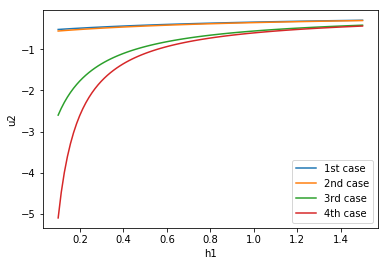

In [7]:
# plotting all the cases together
plt.plot(h1_vec,u2_vec1, label = '1st case')
plt.plot(h1_vec,u2_vec2, label = '2nd case')
plt.plot(h1_vec,u2_vec3, label = '3rd case')
plt.plot(h1_vec,u2_vec4, label = '4th case')
plt.legend()
plt.xlabel('h1')
plt.ylabel('u2')

In [8]:
# b. defining labor suply in function of human capital


    # 1st case: l1=1, l2=1 and x=0.1
ls_vec1 = np.empty(100)
for i,x in enumerate (h1_vec):
    def labor_suply1(x):
        if x >= x_list1[0]:
            return 1
        else:
            return 0
    ls_vec1[i] = labor_suply1(x)
        

    # 2nd case: l1=1, l2=1 and x=0
ls_vec2 = np.empty(100)
for i,x in enumerate (h1_vec):
    def labor_suply2(x):
        if x >= x_list2[0]:
            return 1
        else:
            return 0
    ls_vec2[i] = labor_suply2(x)
    
    
    # 3rd case: l1=0, l2=1 and x=0.1
ls_vec3 = np.empty(100)
for i,x in enumerate (h1_vec):
    def labor_suply3(x):
        if x >= x_list3[0]:
            return 1
        else:
            return 0
    ls_vec3[i] = labor_suply3(x)
    
    # 4th case: l1=0, l2=1 and x=0
ls_vec4 = np.empty(100)
for i,x in enumerate (h1_vec):
    def labor_suply4(x):
        if x >= x_list4[0]:
            return 1
        else:
            return 0
    ls_vec4[i] = labor_suply4(x)

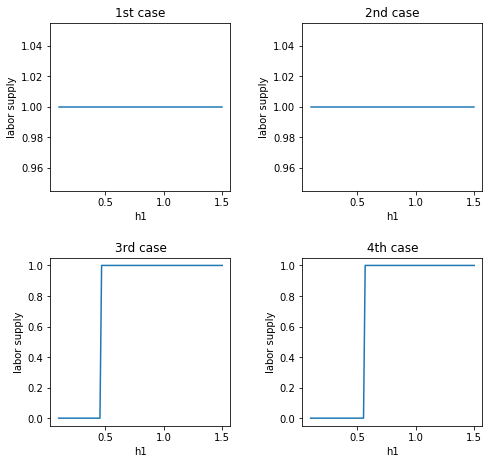

In [9]:
# plotting labor vs h1 for each case
plt.figure(1)

# 1st case: l1=1, l2=1 and x=0.1
plt.subplot(221)
plt.plot(h1_vec,ls_vec1)
plt.xlabel('h1')
plt.ylabel('labor supply')
plt.title('1st case')

# 2nd case: l1=1, l2=1 and x=0
plt.subplot(222)
plt.plot(h1_vec,ls_vec2)
plt.xlabel('h1')
plt.ylabel('labor supply')
plt.title('2nd case')

# 3rd case: l1=0, l2=1 and x=0.1
plt.subplot(223)
plt.plot(h1_vec,ls_vec3)
plt.xlabel('h1')
plt.ylabel('labor supply')
plt.title('3rd case')

# 4th case: l1=0, l2=1 and x=0
plt.subplot(224)
plt.plot(h1_vec,ls_vec4)
plt.xlabel('h1')
plt.ylabel('labor supply')
plt.title('4th case')

# adjusting positions of the figures
plt.subplots_adjust(top=1.5, bottom=0.1, left=0.5, right=1.5, hspace=0.4,
                    wspace=0.4)

# Question 2

As defined, the utility function for period 1 if she works is:

    U1(h1) = max. ((C1**(1-rho))/(1-rho))-gamma*l1 + beta*E[U2(h2)]
    
    beta = 0.96
    E[U2(h2)] is the expected value of living in period 2
    
If she does not work in period 1, C1=b=1

U2 depends on the stochastic X(x=0 with prob. 0.5 and x=0.1 with prob. 0.5) and on the value of h1(in the vector h1_vec)

We can find the expected value for each case of U2 and then apply the probabilities of X:

In [10]:
# E[U2] for 1st case(works in period 1):
E_1 = sum(u2_vec1)/100
print(E_1)

# E[U2] for 2nd case(works in period 1):
E_2 = sum(u2_vec2)/100
print(E_2)

# E[U2] for 3rd case(does not work in period 1):
E_3 = sum(u2_vec3)/100
print(E_3)

# E[U2] for 4th case(does not work in period 1):
E_4 = sum(u2_vec4)/100
print(E_4)

-0.3764259452892067
-0.39355192069198464
-0.8494385478040742
-1.0847412844082434


In [11]:
# applying the probabilities of X:
E1 = 0.5*E_1 + 0.5*E_2
print(E1)

E2 = 0.5*E_3 + 0.5*E_4
print(E2)

-0.38498893299059567
-0.9670899161061588


In [12]:
# finding the final expected values knowing that beta = 0.96
y1 = 0.96*E1
print(y1)

y2 = 0.96*E2
print(y2)

-0.36958937567097183
-0.9284063194619124


To maximize the utility function, we are looking separetely for the four cases faced by the worker:
    
    1st case: l1=1, l2=1
    2nd case: l1=1, l2=0
    3rd case: l1=0, l2=1
    4th case: l1=0, l2=0
    
We will analyse each case and conclude with the choice of the worker (assuming that she can choose the values of L1 and L2)

Now we can find the symplified utility functions:

a. 1st case:
    
    U1_1 = max. ((C1**(1-rho))/(1-rho))-gamma*l1 + y1
    
b. 2nd case:
    
    U1_2 = max. ((C1**(1-rho))/(1-rho))-gamma*l1 + y2
    
c. 3rd case:

    U1_3 = max. -1 + y1
    
d. 4th case:
    
    U1_4 = max. -1 + y2

In [13]:
# defining the functions

def u1_1(h1,l1,y1,w=2,rho=2,gamma=0.1):
    return (((w*h1*l1)**(1-rho))/(1-rho))-gamma*l1+y1

def u1_2(h1,l1,y2,w=2,rho=2,gamma=0.1):
    return (((w*h1*l1)**(1-rho))/(1-rho))-gamma*l1+y2

def u1_3(y1):
    return -1 + y1

def u1_4(y2):
    return -1 + y2

In [14]:
# a. finding the curves of utility


    # 1st case: l1=1, l2=1
u1_vec1 = np.empty(100)
for i,x in enumerate(h1_vec):
    u1_now1 = u1_vec1[i] = u1_1(x,1,y1)


    # 2nd case: l1=1, l2=0
u1_vec2 = np.empty(100)
for i,x in enumerate(h1_vec):
    u1_now2 = u1_vec2[i] = u1_2(x,1,y2)
    

    # 3rd case: l1=0, l2=1
u1_vec3 = np.empty(100)
for i,x in enumerate(h1_vec):
    u1_now3 = u1_vec3[i] = u1_3(y1)


    # 4th case: l1=0, l2=0
u1_vec4 = np.empty(100)
for i,x in enumerate(h1_vec):
    u1_now4 = u1_vec4[i] = u1_4(y2)

Text(0, 0.5, 'u1')

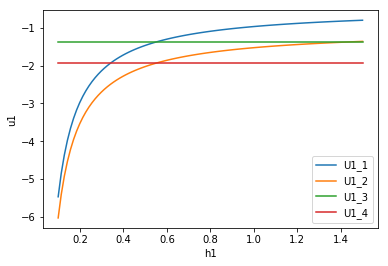

In [15]:
# plotting all the cases together
plt.plot(h1_vec,u1_vec1, label = 'U1_1')
plt.plot(h1_vec,u1_vec2, label = 'U1_2')
plt.plot(h1_vec,u1_vec3, label = 'U1_3')
plt.plot(h1_vec,u1_vec4, label = 'U1_4')
plt.legend()
plt.xlabel('h1')
plt.ylabel('u1')

Analysing the graph we can reach 2 conclusions:

1. She will not work when the biggest values of u1 come from U1_3
2. She will work when the biggest values come from U1_1

This means that the value of h1 that equals U1_1 and U1_3 is an inflexion point

To find this value:

    (((2h1_infl)**(-1))/-1)-0,1+y1 = -1 + y1
    h1_infl = 1/1.8

In [16]:
h1_infl = 1/1.8
print(h1_infl)

0.5555555555555556


_Conclusion_:
1. She will work if h1 > 0.55...
2. She will not work if h1 < 0.55...

Text(0, 0.5, 'labor supply')

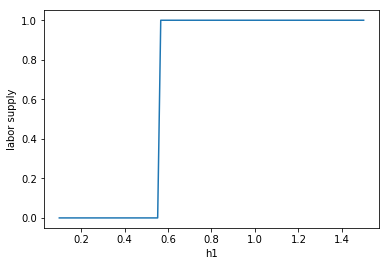

In [17]:
# Now that we know the inflexion point, we can plot a graph labor vs h1
ls_vec5 = np.empty(100)
for i,x in enumerate (h1_vec):
    def labor_suply5(x):
        if x > h1_infl:
            return 1
        else:
            return 0
    ls_vec5[i] = labor_suply5(x)
    
plt.plot(h1_vec,ls_vec5)
plt.xlabel('h1')
plt.ylabel('labor supply')

# Question 3

Directly, we can say that the answer is no, she will not always choose not to work if her unemployment benefit is higher than her potential wage. This occurs because her choice is made based on her utility function, that depends also on other arguments besides wage and benefits.

To illustrate that situation, we can compare her choices in period 2 as defined above with different values of unemployment benefits(b).

In [94]:
# defining utility function when not working (C = b)
def ub(b,rho=2,gamma=0.1,l2=0):
    return ((b**(1-rho))/(1-rho))-gamma*l2

In [95]:
# Choosing 4 different values for b we can compare the cases when its lower, equal and higher(twice) than the wage = 2
b_vec = [1,2,2.5,5]

# utility for 1st case: b=1
ub_vec1 = np.empty(100)
for i,x in enumerate(h1_vec):
    ub_now1 = ub_vec1[i] = ub(b_vec[0])

# utility for 2nd case: b=2    
ub_vec2 = np.empty(100)
for i,x in enumerate(h1_vec):
    ub_now2 = ub_vec2[i] = ub(b_vec[1])
    
# utility for 3rd case: b=2.5    
ub_vec3 = np.empty(100)
for i,x in enumerate(h1_vec):
    ub_now3 = ub_vec3[i] = ub(b_vec[2])
    
# utility for 4th case: b=5    
ub_vec4 = np.empty(100)
for i,x in enumerate(h1_vec):
    ub_now4 = ub_vec4[i] = ub(b_vec[3])

When plotting the four cases, we can clearly visualize if the worker will choose not to work (utility function for b is higher than for utility functions of working in period 2)

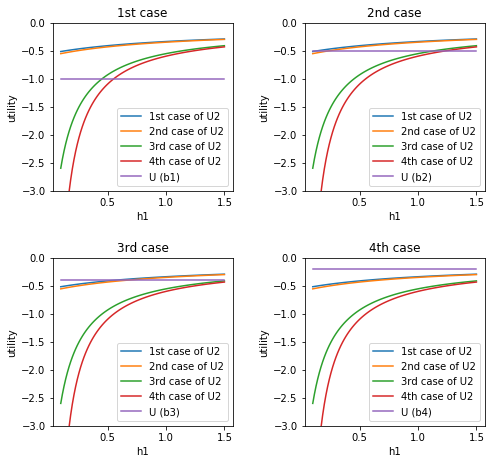

In [99]:
plt.figure(1)

# 1st case: b=1
plt.subplot(221)
plt.plot(h1_vec,u2_vec1, label = '1st case of U2')
plt.plot(h1_vec,u2_vec2, label = '2nd case of U2')
plt.plot(h1_vec,u2_vec3, label = '3rd case of U2')
plt.plot(h1_vec,u2_vec4, label = '4th case of U2')
plt.plot(h1_vec,ub_vec1, label = 'U (b1)')
plt.legend()
plt.xlabel('h1')
plt.ylabel('utility')
plt.title('1st case')
plt.ylim(-3, 0)

# 2nd case: b=2
plt.subplot(222)
plt.plot(h1_vec,u2_vec1, label = '1st case of U2')
plt.plot(h1_vec,u2_vec2, label = '2nd case of U2')
plt.plot(h1_vec,u2_vec3, label = '3rd case of U2')
plt.plot(h1_vec,u2_vec4, label = '4th case of U2')
plt.plot(h1_vec,ub_vec2, label = 'U (b2)')
plt.legend()
plt.xlabel('h1')
plt.ylabel('utility')
plt.title('2nd case')
plt.ylim(-3, 0)

# 3rd case: b=2.5
plt.subplot(223)
plt.plot(h1_vec,u2_vec1, label = '1st case of U2')
plt.plot(h1_vec,u2_vec2, label = '2nd case of U2')
plt.plot(h1_vec,u2_vec3, label = '3rd case of U2')
plt.plot(h1_vec,u2_vec4, label = '4th case of U2')
plt.plot(h1_vec,ub_vec3, label = 'U (b3)')
plt.legend()
plt.xlabel('h1')
plt.ylabel('utility')
plt.title('3rd case')
plt.ylim(-3, 0)

# 4th case: b=5
plt.subplot(224)
plt.plot(h1_vec,u2_vec1, label = '1st case of U2')
plt.plot(h1_vec,u2_vec2, label = '2nd case of U2')
plt.plot(h1_vec,u2_vec3, label = '3rd case of U2')
plt.plot(h1_vec,u2_vec4, label = '4th case of U2')
plt.plot(h1_vec,ub_vec4, label = 'U (b4)')
plt.legend()
plt.xlabel('h1')
plt.ylabel('utility')
plt.title('4th case')
plt.ylim(-3, 0)

# adjusting positions of the figures
plt.subplots_adjust(top=1.5, bottom=0.1, left=0.5, right=1.5, hspace=0.4,
                    wspace=0.4)

_Conclusion_:
1. The 3rd case is an example that b can be bigger than wage and (depending on h1) the worker can choose to work
2. As ilustrated by the 4th case, a high level of b makes it always better not to work